# 1st of lets check our enivronment with a basic "hello world" Program

In [1]:
print('hello world')

hello world


# Objective: Setting up a environment for model development

For that we need to install 1. Anaconda Navigator, 2.Jupiter Notebook, 3.Visual Studio Code for Flask operation, 4.Render for hosting.

 ## Aim : Given a person’s credit-related information, build a machine learning model that can classify the credit score.
 
 A DML model has also been built so that user can enter their details to know what Category their Credit Score lies in.

## **Table of Contents**

**1.Importing.**

**2.Reading Data.**

**3.Data Exploration.**

**4.Data Cleaning.**

**5.Data Preprocessing.**

**6.Modeling and Evaluation.**

# BUILD a CLASSIFICATION MODEL with Highest Accuracy, Precison and Recall score.

## Import the required libraries.

In [2]:
import pandas as pd                                                      #FOR Pandas
import numpy as np                                                       #FOR Numpy
import matplotlib.pyplot as plt                                          #FOR PLOTTING
import statistics as stat                                                #FOR STATISTICS (MEAN, MODE AND MEDIANS) IF REQUIRED
import seaborn as sns                                                    #FOR PLOTTING
from sklearn.preprocessing import LabelEncoder                           #For encoding catergoircal values object data
from sklearn.preprocessing import StandardScaler                         #FOR STANDARD SCALING
from sklearn.model_selection import train_test_split                      #FOR TRAIN TEST SPLIT
from sklearn.linear_model import LogisticRegression                      #FOR LOGISTIC REGRESSION
from sklearn.tree import DecisionTreeClassifier                          #DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier                      #RandomForestClassifier
from sklearn.svm import SVC                                              #for svm-svc classification
from sklearn.neighbors import KNeighborsClassifier                       #for knn classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix        #classifiers metrics

## Importing the required dataset into our colab environment.

In [3]:
data=pd.read_csv(r"D:\Python\Internship\Classification\credit.csv")

**Lets analyze the dataset using head() and tail() functions**

In [4]:
data.head() # checking the rows data of first 5 rows

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,26.822620,265,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.944960,266,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629163,Good
2,5636,3392,3,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,28.609352,267,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,31.377862,268,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23,821000265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,269,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [5]:
data.tail() # checking the rows data of last 5 rows

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
99995,155625,37932,4,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,34.663572,378,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,40.565631,379,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,380,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,381,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard
99999,155629,37932,8,Nicks,25,78735990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,34.192463,382,No,35.104023,24.028477,High_spent_Medium_value_payments,393.673696,Poor


# EDA (Exploratory Data Analysis) 

**Know the shape of the dataset like: 1st:Rows then Columns.** 

In [6]:
data.shape   #The dataset contains 100000 rows of information and 28 columns/features. 

(100000, 28)

**Taking the information function of the daatset.**

In [7]:
data.info() #Gives index, column/feature name, NON-NULL count and Dataypes. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  int64  
 5   SSN                       100000 non-null  int64  
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              100000 non-null  ob

**statistical data analysis describe function()**      #FUNCTION TO INVOKE statistical data 

In [8]:
data.describe()      #FUNCTION TO INVOKE COUNT,MEAN,STANDARD DEVIATION,MIN AND MAX VALUES collectivelly called as statistical data analysis

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633330,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


**Analyze data columns and display it on screen**

In [9]:
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

**Analyze each features data-types single_handly**

In [10]:
data.dtypes

ID                            int64
Customer_ID                   int64
Month                         int64
Name                         object
Age                           int64
SSN                           int64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment        int64
Changed_Credit_Limit        float64
Num_Credit_Inquiries          int64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age            int64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [11]:
data.size

2800000

# Function to check whether there is any duplicates within the data.

In [12]:
data.duplicated().sum()

0

### no duplicates was found within the dataset.

# **DATA VISUALIZATIONS**

## **1.Univariate Visualizations**

# 1.1.'Count' vs 'Month'  

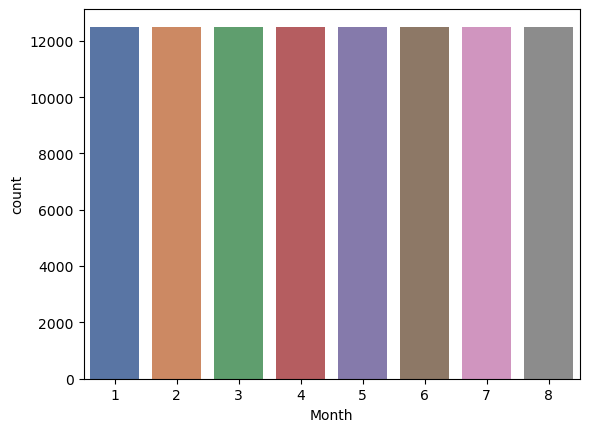

In [13]:
sns.countplot(x = data['Month'],palette = "deep");

# 1.2.'Count' Vs 'Occupation'

In [14]:
data['Occupation'].nunique()

15

In [15]:
data['Occupation'].unique()

array(['Scientist', 'Teacher', 'Engineer', 'Entrepreneur', 'Developer',
       'Lawyer', 'Media_Manager', 'Doctor', 'Journalist', 'Manager',
       'Accountant', 'Musician', 'Mechanic', 'Writer', 'Architect'],
      dtype=object)

In [16]:
data['Occupation'].value_counts()

Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64

# 1.3.Histogram for Age

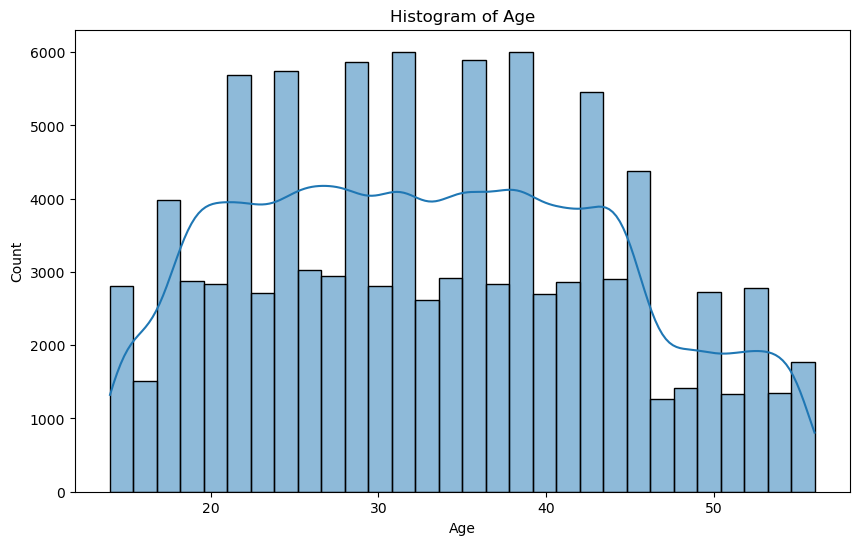

In [17]:
# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 1.4.Box Plot for Annual_Income

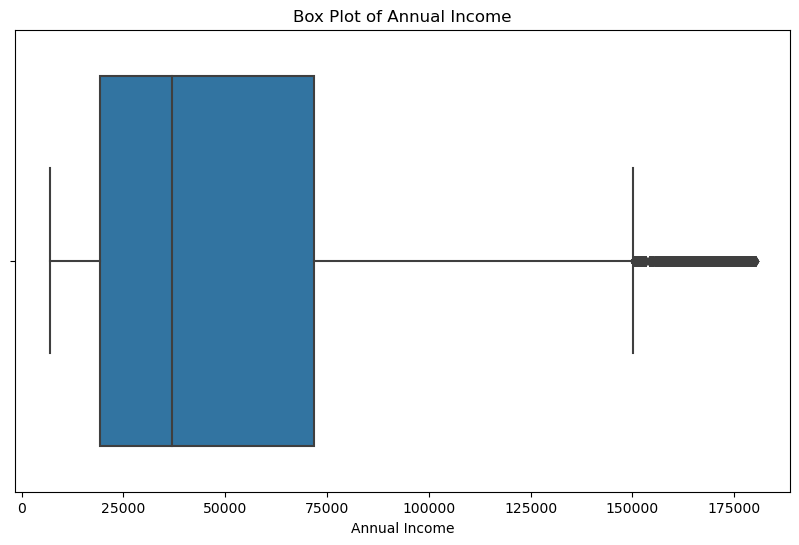

In [18]:
# Box Plot for Annual Income
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Annual_Income'])
plt.title("Box Plot of Annual Income")
plt.xlabel("Annual Income")
plt.show()

**Here we find Outliers within the feature values.**

# 1.5.Histogram for Occupation

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Scientist'),
  Text(1, 0, 'Teacher'),
  Text(2, 0, 'Engineer'),
  Text(3, 0, 'Entrepreneur'),
  Text(4, 0, 'Developer'),
  Text(5, 0, 'Lawyer'),
  Text(6, 0, 'Media_Manager'),
  Text(7, 0, 'Doctor'),
  Text(8, 0, 'Journalist'),
  Text(9, 0, 'Manager'),
  Text(10, 0, 'Accountant'),
  Text(11, 0, 'Musician'),
  Text(12, 0, 'Mechanic'),
  Text(13, 0, 'Writer'),
  Text(14, 0, 'Architect')])

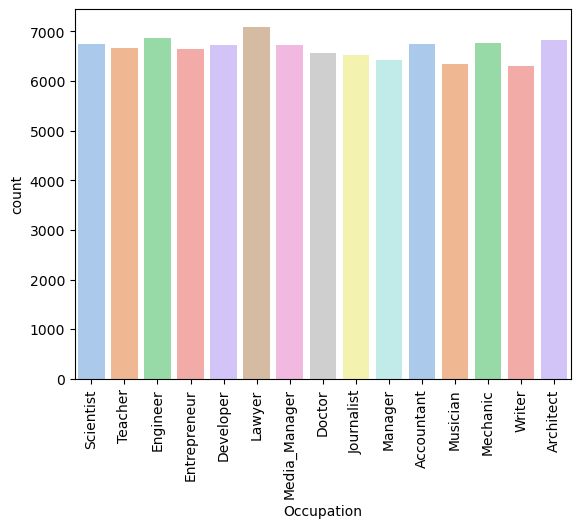

In [19]:
sns.countplot(x = data['Occupation'],palette = "pastel");
plt.xticks(rotation = 90)

# 1.6.Histogram for 'Count' Vs 'Credit_Mix'

In [20]:
data['Credit_Mix'].value_counts()

Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64

In [21]:
data['Credit_Mix'].nunique()

3

In [22]:
data['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

(array([0, 1, 2]),
 [Text(0, 0, 'Good'), Text(1, 0, 'Standard'), Text(2, 0, 'Bad')])

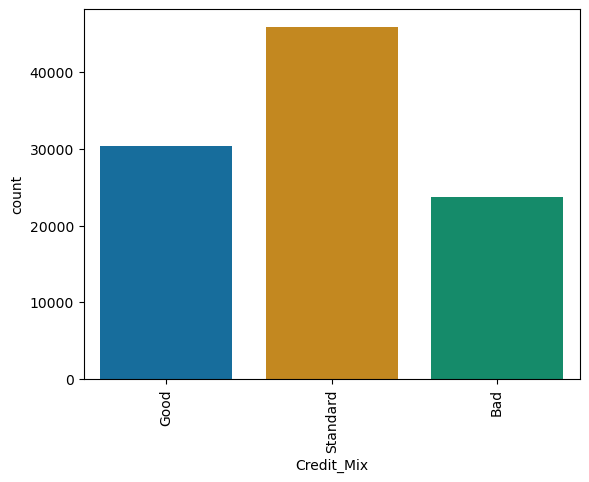

In [23]:
sns.countplot(x = data['Credit_Mix'],palette = "colorblind");
plt.xticks(rotation = 90)

# 1.7.Histogram for'Count' Vs 'Payment_of_Min_Amount'

### Payment_of_Min_Amount

In [24]:
data['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64

In [25]:
data['Payment_of_Min_Amount'].nunique()

3

# Replace arbitarty values with specific values

**1.Payment_of_Min_Amount**

In [26]:
data['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

**Here there are 3 possibilities. Thus OPTION "NM" should be changed into No.(i.e a specfic value.)**

**This feature requires no further changes.** 

## **1.8.Histogram for Payment of min amount**

(array([0, 1, 2]), [Text(0, 0, 'No'), Text(1, 0, 'NM'), Text(2, 0, 'Yes')])

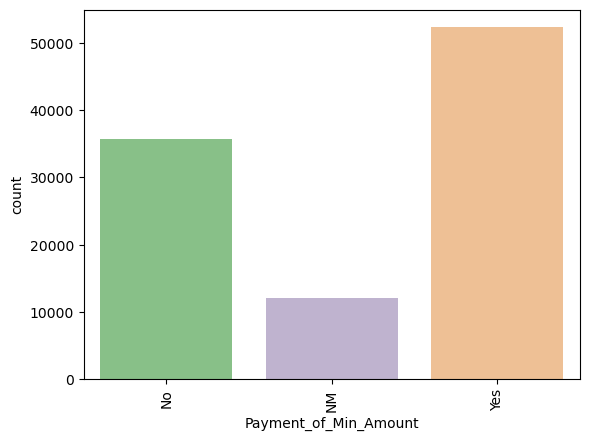

In [27]:
sns.countplot(x = data['Payment_of_Min_Amount'],palette = "Accent");
plt.xticks(rotation = 90)

**See here the feature should be either yes or no. Thus the Condition NM should be converted into no category.** 

**2.Payment_Behaviour Column**

In [28]:
data['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      28616
High_spent_Medium_value_payments    19738
High_spent_Large_value_payments     14726
Low_spent_Medium_value_payments     14399
High_spent_Small_value_payments     11764
Low_spent_Large_value_payments      10757
Name: count, dtype: int64

# 1.9.Histogram for 'Count' Vs 'Credit score'

In [29]:
data['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Good'), Text(1, 0, 'Standard'), Text(2, 0, 'Poor')])

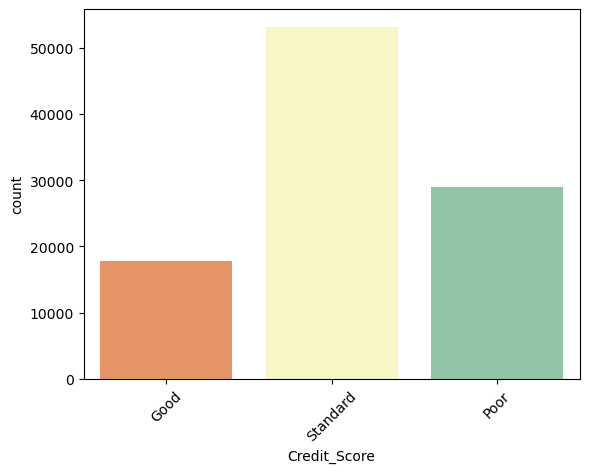

In [30]:
sns.countplot(x = data['Credit_Score'],palette = "Spectral");
plt.xticks(rotation = 45)

# **2. Bivariate Visualizations**

# 2.1.**Scatter Plot for Annual_Income vs Monthly_Inhand_Salary**

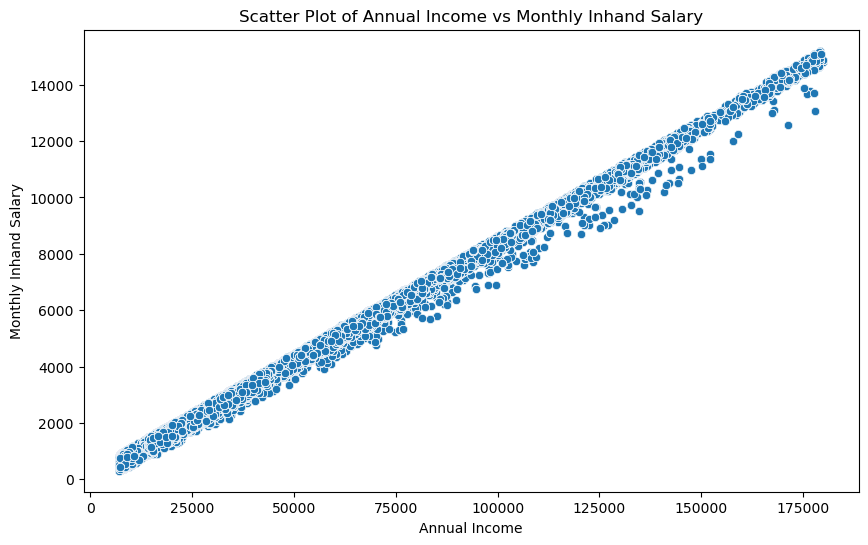

In [31]:
# Scatter Plot for Annual Income vs Monthly Inhand Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual_Income', y='Monthly_Inhand_Salary', data=data)
plt.title("Scatter Plot of Annual Income vs Monthly Inhand Salary")
plt.xlabel("Annual Income")
plt.ylabel("Monthly Inhand Salary")
plt.show()

**Here we can see a linear progression Since as Annual income increases Monthly in hand also increases (Obviously).**

# **2.2.Box Plot for Occupation vs Annual_Income

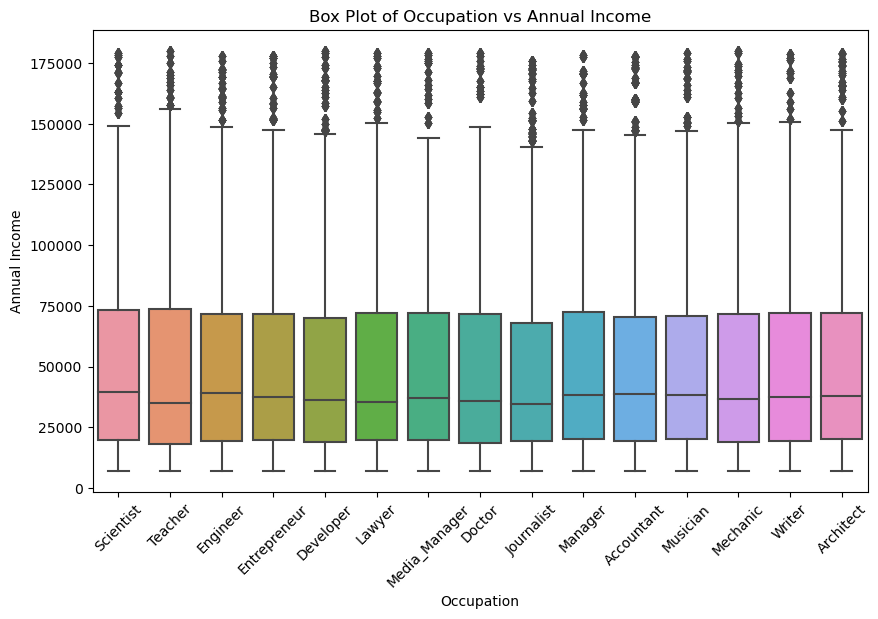

In [32]:
# Box Plot for Occupation vs Annual Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='Occupation', y='Annual_Income', data=data)
plt.title("Box Plot of Occupation vs Annual Income")
plt.xlabel("Occupation")
plt.ylabel("Annual Income")
plt.xticks(rotation=45)
plt.show()

**There are ouliers in each occupation showing there is high ranges of differences between each persons.**

# 3. Trivariate Visualizations

# **3.1.Bubble Chart for Annual_Income, Monthly_Inhand_Salary, and Num_Bank_Accounts**

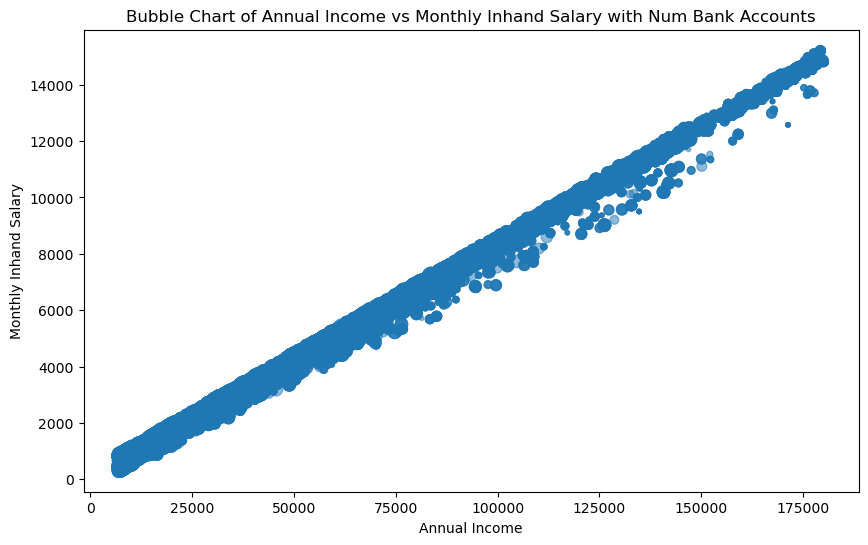

In [33]:
# Bubble Chart for Annual Income, Monthly Inhand Salary, and Num Bank Accounts
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual_Income'], data['Monthly_Inhand_Salary'], s=data['Num_Bank_Accounts']*10, alpha=0.5)
plt.title("Bubble Chart of Annual Income vs Monthly Inhand Salary with Num Bank Accounts")
plt.xlabel("Annual Income")
plt.ylabel("Monthly Inhand Salary")
plt.show()

**if the income is high  the inhand salary is high thus the number of bank accounts is more.**

# 3.2.Pair Plot for Age, Annual_Income, and Monthly_Inhand_Salary

D:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


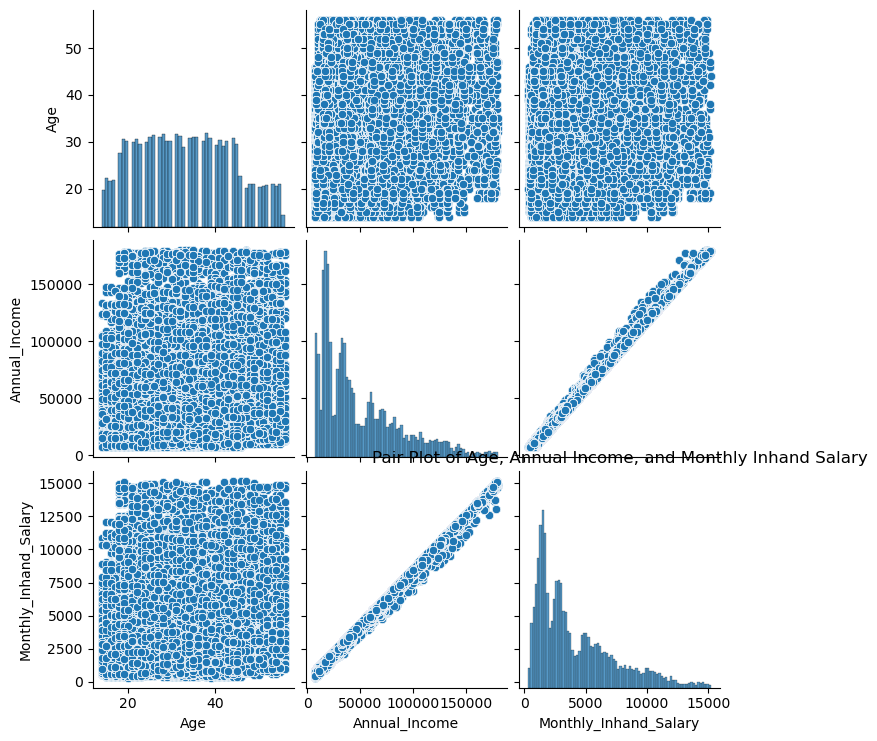

In [34]:
# Pair Plot for Age, Annual Income, and Monthly Inhand Salary
sns.pairplot(data[['Age', 'Annual_Income', 'Monthly_Inhand_Salary']])
plt.title("Pair Plot of Age, Annual Income, and Monthly Inhand Salary")
plt.show()

**Some specific inferences 1.Correlation Between Variables, 2.Distribution of Each Variable, 3.Age and Income Relationship, 4.Monthly_inhand_Salary vs. Annual Income, 5.Data Clusters.**

# 4. Multivariate Visualizations

# **4.1.Pair Plot with Hue for Credit_Score.**

D:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


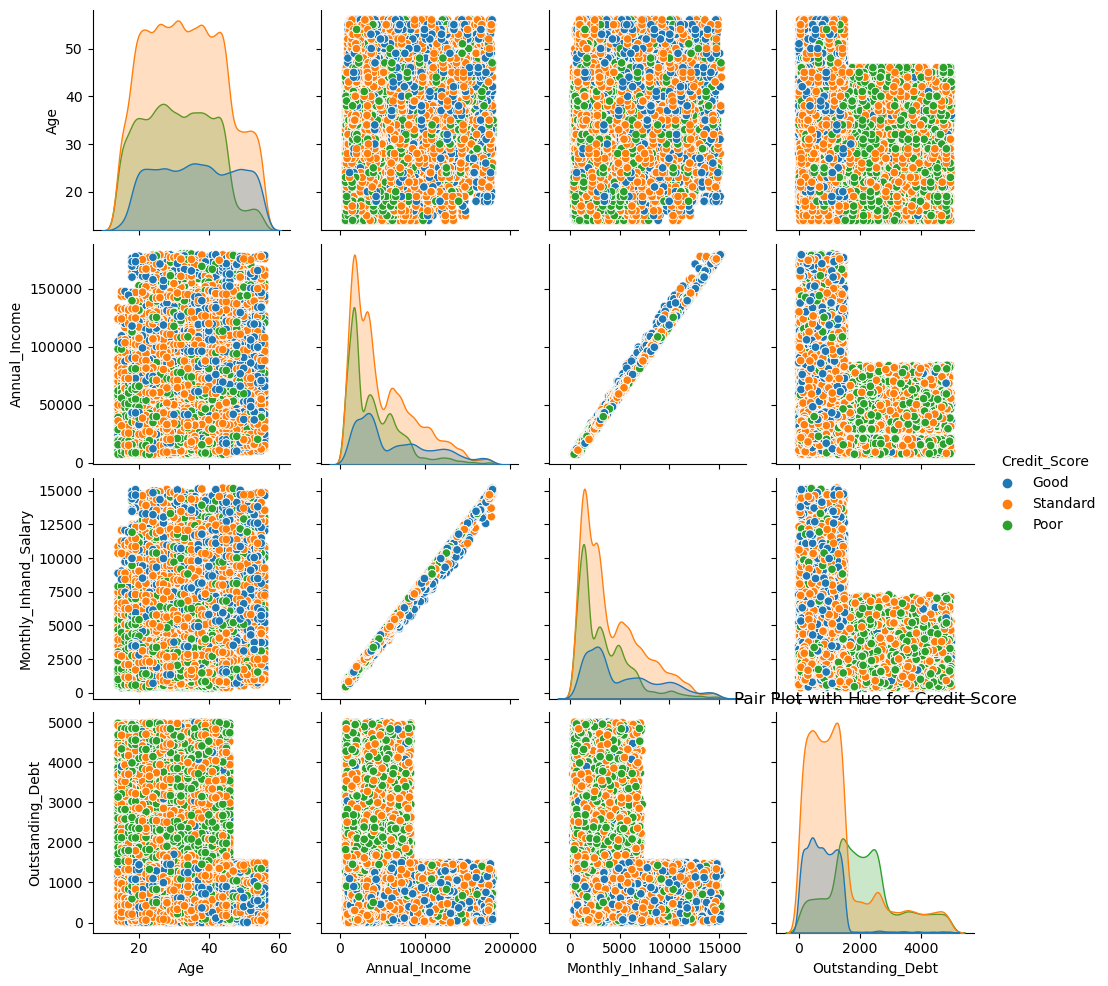

In [35]:
# Pair Plot with Hue for Credit Score
sns.pairplot(data, hue='Credit_Score', vars=['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Outstanding_Debt'])
plt.title("Pair Plot with Hue for Credit Score")
plt.show()

**We can infer relationship between features (Linear, non-Linear, no relationship). Then separation of credit scores aiding in prediction of credit_score. Also helps to find out and Identifying Overlaps, Anomalies, Distribution and Density.**

# 4.2.Facet Grid for Occupation vs Annual_Income with Credit_Score

D:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


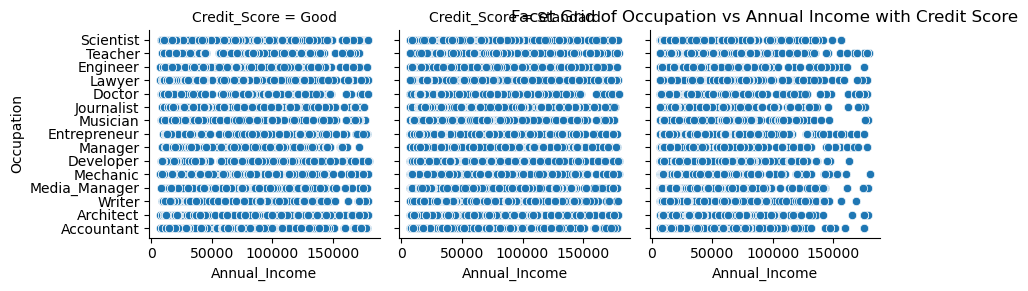

In [36]:
# Facet Grid for Occupation vs Annual Income with Credit Score
g = sns.FacetGrid(data, col='Credit_Score')
g.map(sns.scatterplot, 'Annual_Income', 'Occupation')
plt.title("Facet Grid of Occupation vs Annual Income with Credit Score")
plt.show()

**This visualizations helps us to understand the following:- 1.Income Distribution by Occupation, 2.Credit Score Distribution. 3.Income and Credit Score Relationship, 4.Occupational Segmentation.** 

# Further Investigation.

### Count VS Type of Loan

In [37]:
data['Type_of_Loan'].value_counts().head(10)

Type_of_Loan
No Data                    11408
Not Specified               1408
Credit-Builder Loan         1280
Personal Loan               1272
Debt Consolidation Loan     1264
Student Loan                1240
Payday Loan                 1200
Mortgage Loan               1176
Auto Loan                   1152
Home Equity Loan            1136
Name: count, dtype: int64

In [38]:
data['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [39]:
data['Type_of_Loan'].nunique()

6261

In [40]:
data['Num_Credit_Card'].unique()   # see here there is a value called zero we have to change that because there is no credit without credit cards.

array([ 4,  5,  1,  7,  6,  8,  3,  9,  2, 10, 11,  0], dtype=int64)

In [41]:
data['Num_Credit_Card'].nunique()

12

In [42]:
data['Num_Bank_Accounts'].unique()  #inorder to get a credit card you need a bank account so we need to change this zeo also

array([ 3,  2,  1,  7,  4,  0,  8,  5,  6,  9, 10, 11], dtype=int64)

In [43]:
data['Num_Bank_Accounts'].nunique()

12

In [44]:
data['Num_of_Loan'].nunique()

10

In [45]:
data['Num_of_Loan'].unique()

array([4, 1, 3, 0, 2, 7, 5, 6, 8, 9], dtype=int64)

In [46]:
data['Num_of_Loan'].value_counts()

Num_of_Loan
3    15752
2    15712
4    15456
0    11408
1    11128
6     8144
7     7680
5     7528
9     3856
8     3336
Name: count, dtype: int64

In [47]:
data['Type_of_Loan'].value_counts()

Type_of_Loan
No Data                                                                                                                               11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                  8
Payday 

In [48]:
data['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

In [49]:
data['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [50]:
data['Credit_Score'].nunique()

3

## Conculsions from my investigations from EDA, data studying and visuaizations.

1. Upon studying the dataset:- **Features/columns such as ID, Customer_ID, Month, Name, Age, SSN, Occupation possess uniques values set and is different for all. Hence we can drop these features.**<br>


2. The column/feature **Num_Credit_Card has zero as its value. I am assuming that in-order to have credit score or get credit one has to avail atleast one credit card. Hence the Num_Credit_Card should be one to have a credit score. So set Num_Credit_Card>= 1.**<br>   


3. Feature Engineering is essential for the column/Feature **Type_of_Loan we need to sub-divide it into 9 additional columns.**<br>


4. Feature/column **Payment_of_Min_Amount has 3 unique values, they are "Yes", "NO", "NA". It is sure that a person who takes the credit should atleast deposit/pay-back the minimum amount. Hence "NA" values should be converted to No option.**<br>


5. **Target column/Target feature is biased. Which may even cause problem while ML development and deployement.**<br> 

# DATA PRE-PROCESSING

**1.DATA CLEANING**

As the first part of cleaning some features are being reduced. As established in the above conculsions listed above. 

In [51]:
data.drop('ID',axis=1,inplace=True)
data.drop('Customer_ID',axis=1,inplace=True)
data.drop('Month',axis=1,inplace=True)
data.drop('Name',axis=1,inplace=True)
data.drop('Age',axis=1,inplace=True)
data.drop('SSN',axis=1,inplace=True)
data.drop('Occupation',axis=1,inplace=True)

Features/columns such as **ID, Customer_ID, Month, Name, Age, SSN, Occupation** possess uniques values set and is different for all. Hence we can drop these features.

## Divide type of loans into 9 different columns

In [52]:
for i in data['Type_of_Loan'].value_counts().head(10).index[1:]: 
    data[i] = data['Type_of_Loan'].str.contains(i).astype(str)

data.drop('Type_of_Loan', axis=1, inplace=True)

## Allocating Credit Card number owned to atleast one.

In [53]:
data['Num_Credit_Card'].replace(0,1,inplace=True)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Annual_Income             100000 non-null  float64
 1   Monthly_Inhand_Salary     100000 non-null  float64
 2   Num_Bank_Accounts         100000 non-null  int64  
 3   Num_Credit_Card           100000 non-null  int64  
 4   Interest_Rate             100000 non-null  int64  
 5   Num_of_Loan               100000 non-null  int64  
 6   Delay_from_due_date       100000 non-null  int64  
 7   Num_of_Delayed_Payment    100000 non-null  int64  
 8   Changed_Credit_Limit      100000 non-null  float64
 9   Num_Credit_Inquiries      100000 non-null  int64  
 10  Credit_Mix                100000 non-null  object 
 11  Outstanding_Debt          100000 non-null  float64
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Credit_History_Age        100000 non-null  in

## 1.check for null values

In [55]:
data.isna().sum()    #function to invoke sum of null values in each columns

Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Not Specified               0
Credit-Builder Loan         0
Personal Loan               0
Debt Consolidation Loan     0
Student Loan                0
Payday Loan                 0
Mortgage Loan               0
Auto Loan                   0
Home Equity Loan            0
dtype: int64

# NO NULL VALUES WITH IN THE DATASET.

# 2.Checking for OUTLIERS

## We need to check each feature skewness i.e if bell shaped it needs to be Z - score test else if skewed IQR(Interquartile Range Test)

In [56]:
freqgraph = data.select_dtypes(include=['float64', 'int64'])

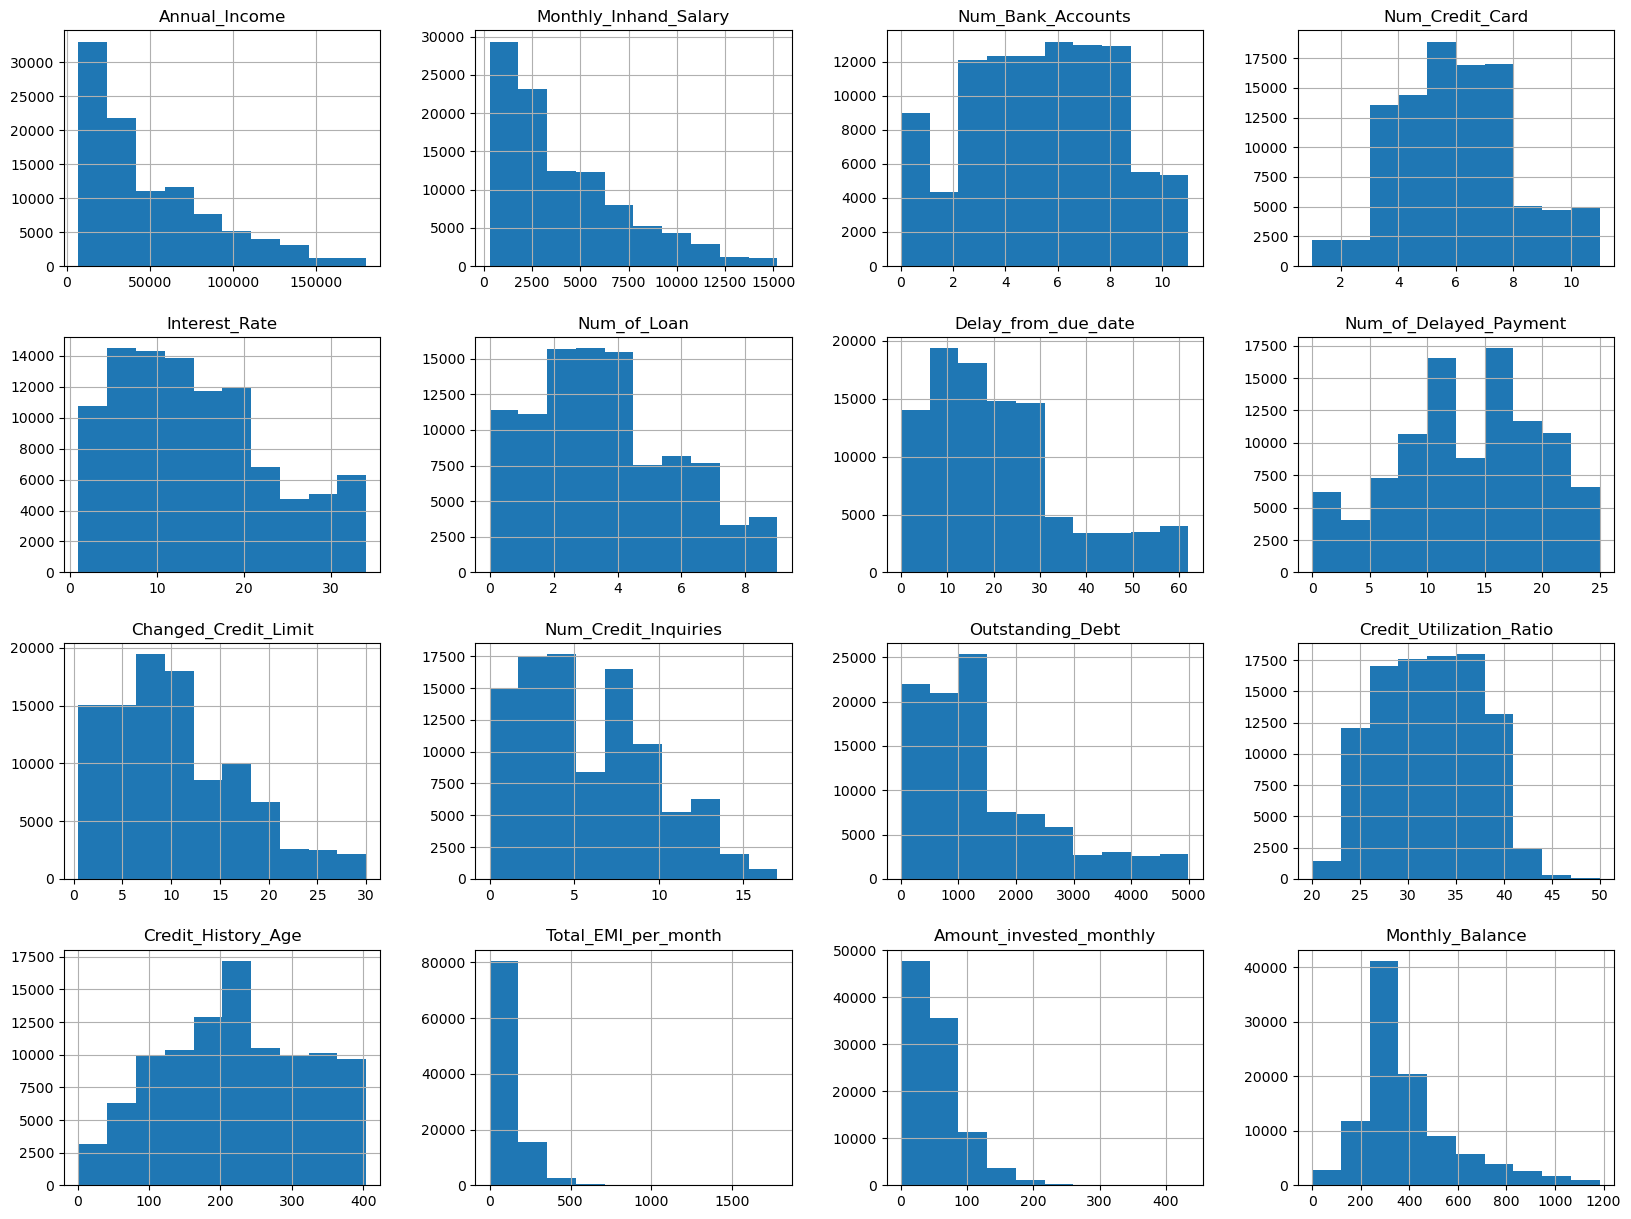

In [57]:
freqgraph.hist(figsize=(20,15))
plt.show()

All GRAPHS ARE Skewed.

In [58]:
data.head()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Credit_Score,Not Specified,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
0,19114.12,1824.843333,3,4,3,4,3,7,11.27,4,...,Good,False,True,True,False,False,False,False,True,True
1,19114.12,1824.843333,3,4,3,4,3,4,11.27,4,...,Good,False,True,True,False,False,False,False,True,True
2,19114.12,1824.843333,3,4,3,4,3,7,11.27,4,...,Good,False,True,True,False,False,False,False,True,True
3,19114.12,1824.843333,3,4,3,4,5,4,6.27,4,...,Good,False,True,True,False,False,False,False,True,True
4,19114.12,1824.843333,3,4,3,4,6,4,11.27,4,...,Good,False,True,True,False,False,False,False,True,True


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Annual_Income             100000 non-null  float64
 1   Monthly_Inhand_Salary     100000 non-null  float64
 2   Num_Bank_Accounts         100000 non-null  int64  
 3   Num_Credit_Card           100000 non-null  int64  
 4   Interest_Rate             100000 non-null  int64  
 5   Num_of_Loan               100000 non-null  int64  
 6   Delay_from_due_date       100000 non-null  int64  
 7   Num_of_Delayed_Payment    100000 non-null  int64  
 8   Changed_Credit_Limit      100000 non-null  float64
 9   Num_Credit_Inquiries      100000 non-null  int64  
 10  Credit_Mix                100000 non-null  object 
 11  Outstanding_Debt          100000 non-null  float64
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Credit_History_Age        100000 non-null  in

In [60]:
new_columns_out = ['Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']
#SELECTING numerical COLUMNS THAT NEEDS TO BE OUTLIER DETECTED AT ONCE USING A FOR LOOP 

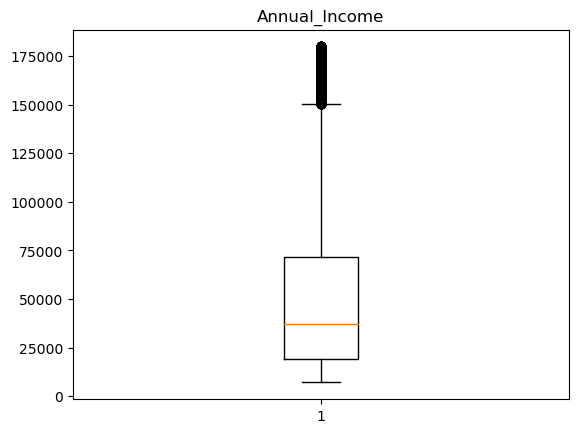

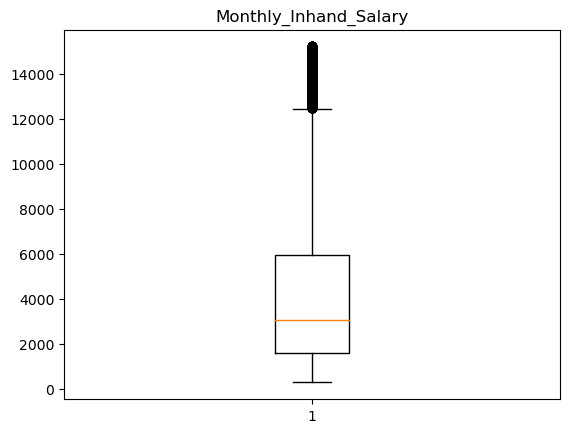

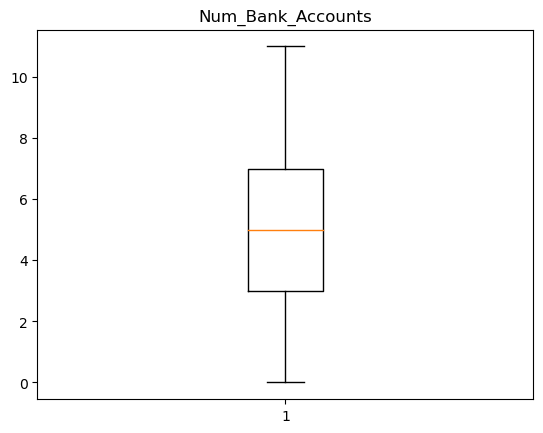

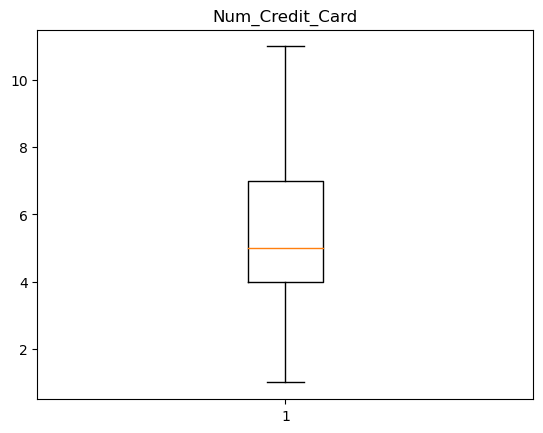

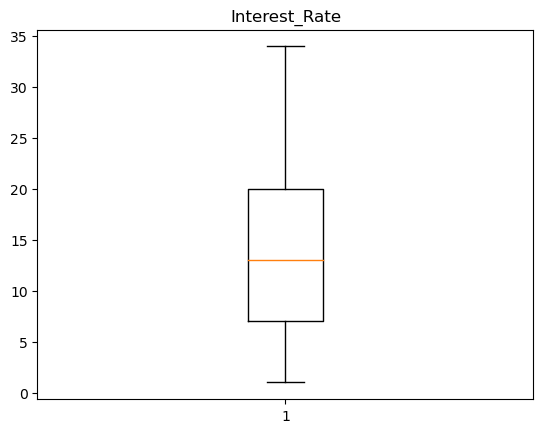

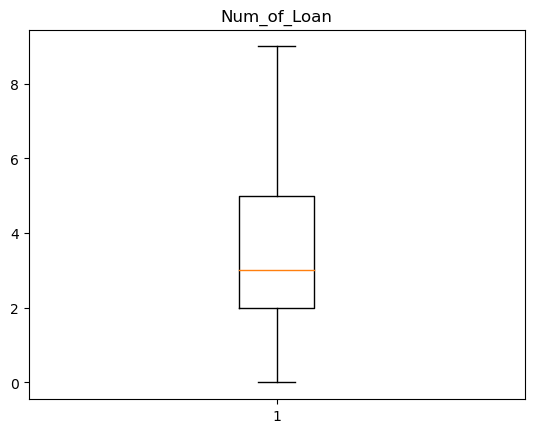

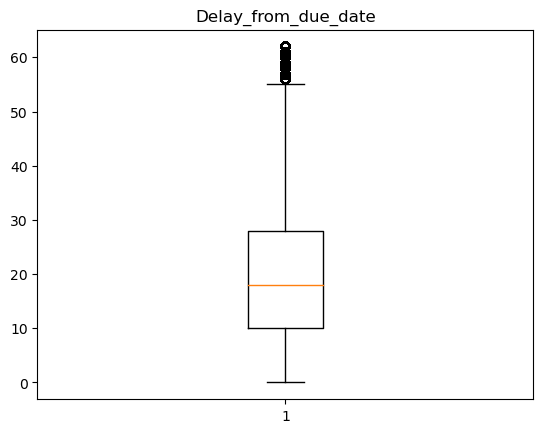

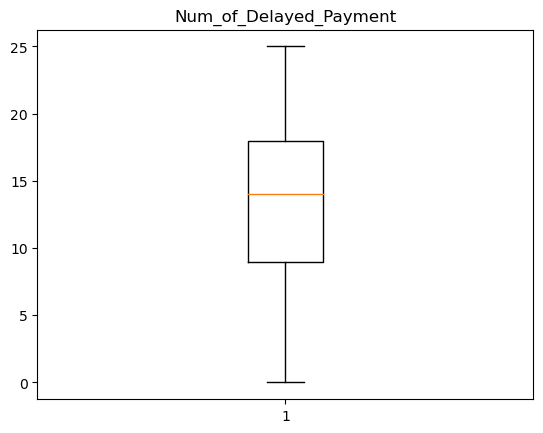

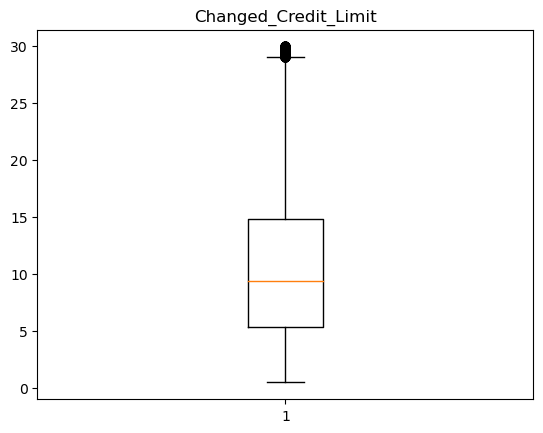

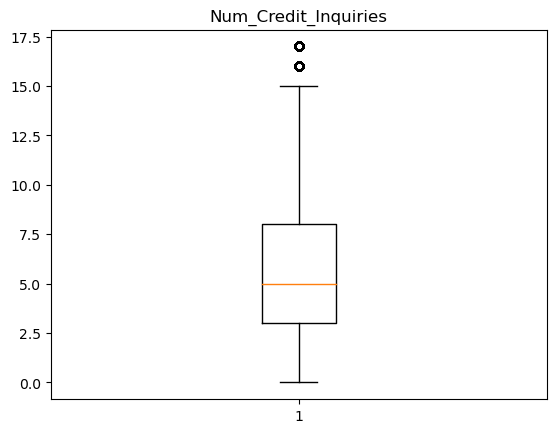

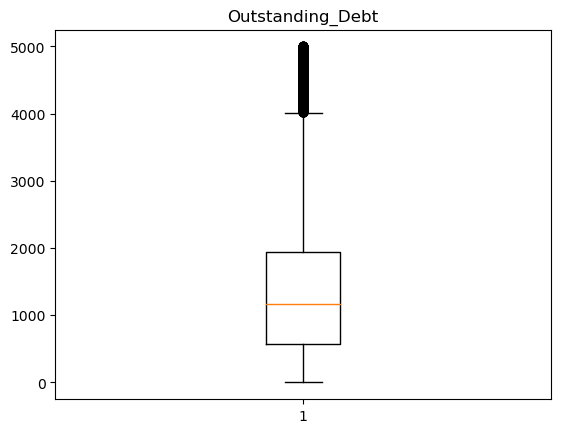

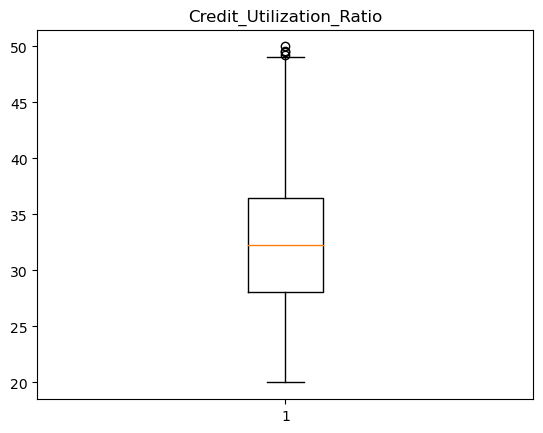

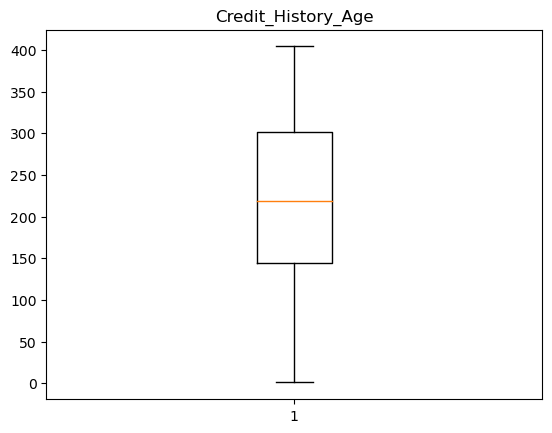

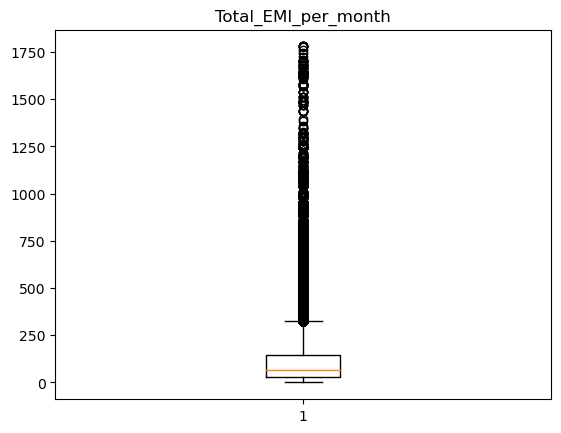

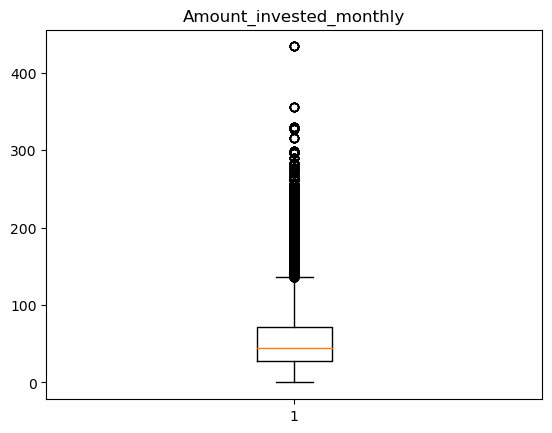

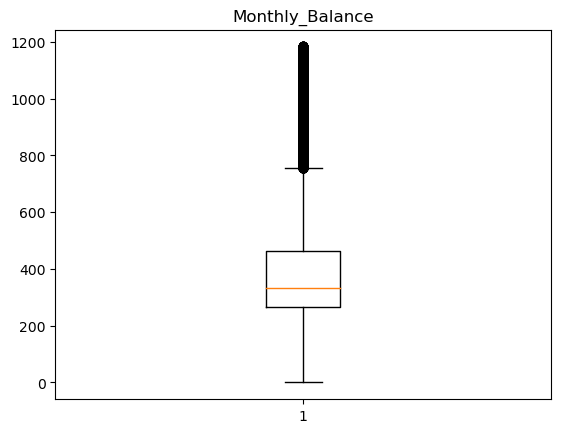

In [61]:
for i in new_columns_out:
  plt.figure(i)
  plt.boxplot(data[i])
  plt.title(i);

In [62]:
#outlier clipping is done by

for j in ['Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']:
    Q1=np.percentile(data[j],25,method='midpoint')
    Q2=np.percentile(data[j],50,method='midpoint')
    Q3=np.percentile(data[j],75,method='midpoint')
    IQR = Q3-Q1
    low_lim = Q1-1.5*IQR
    up_lim = Q3+1.5*IQR
    outliers = []
    for h in data[j]:
        if ((h < low_lim) | (h > up_lim)):
            outliers.append(h)
    data[j]=data[j].clip(lower=low_lim,upper=up_lim)   


In [63]:
new_columns_out_final = ['Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate','Num_of_Loan','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']

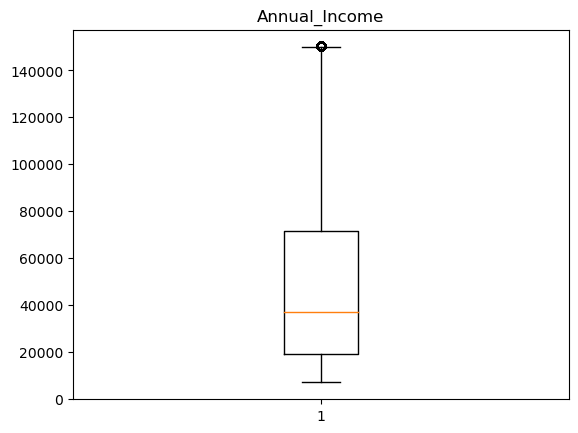

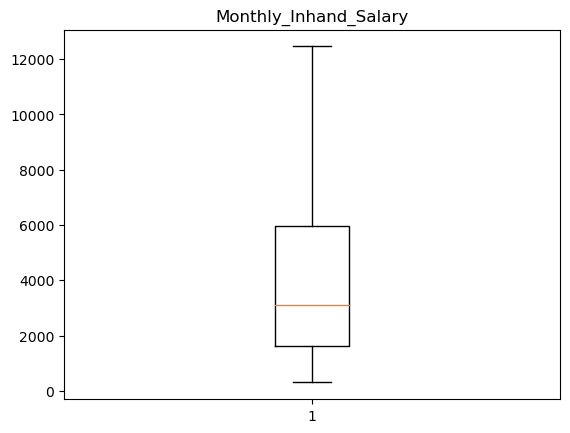

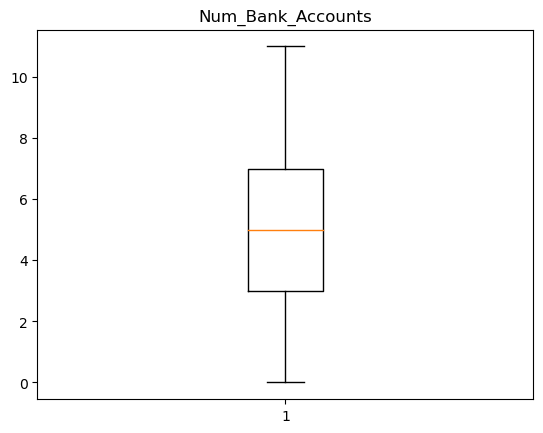

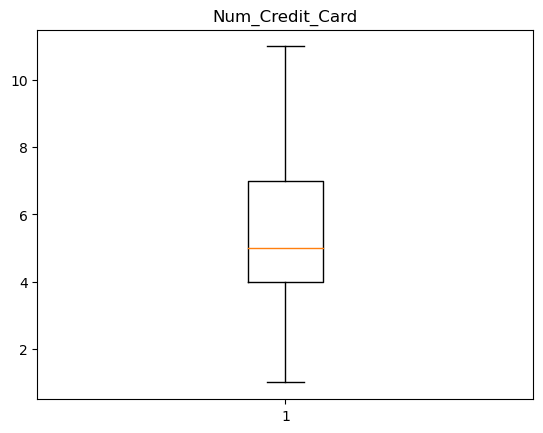

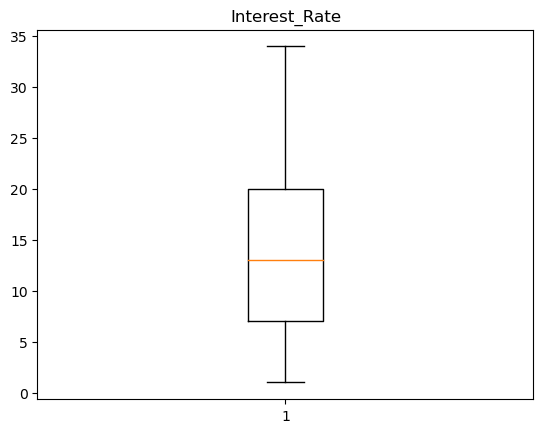

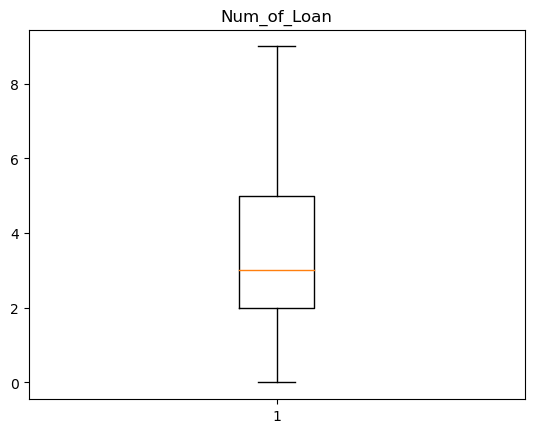

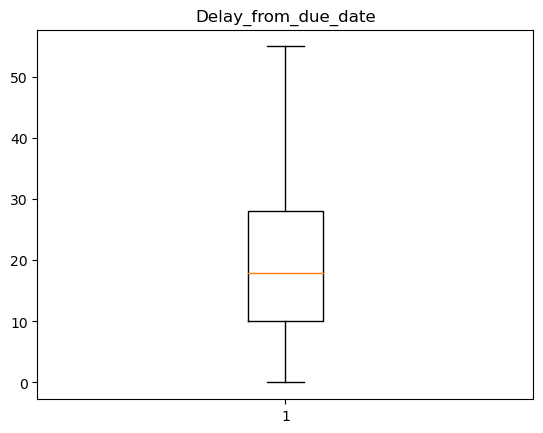

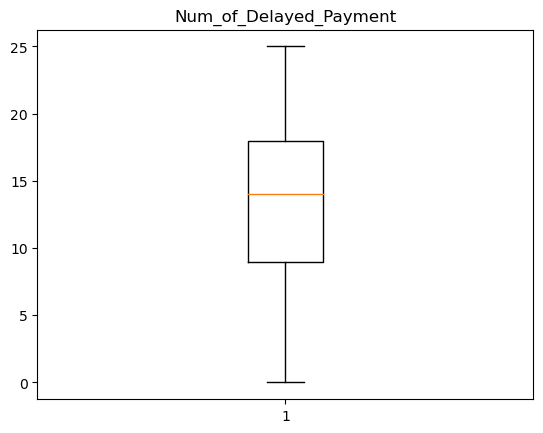

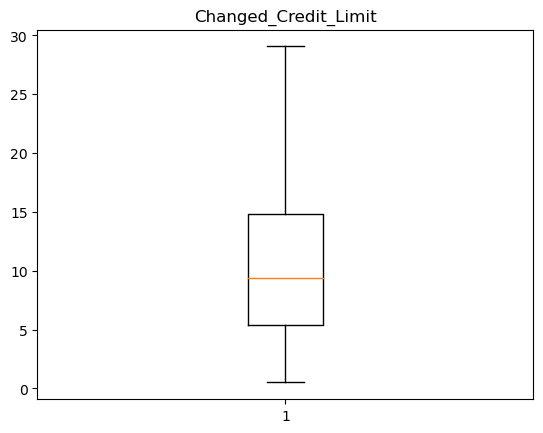

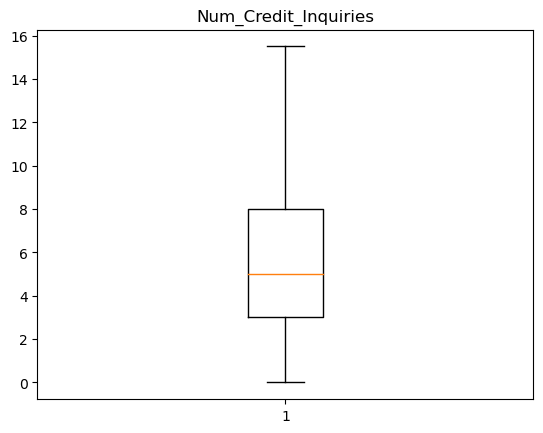

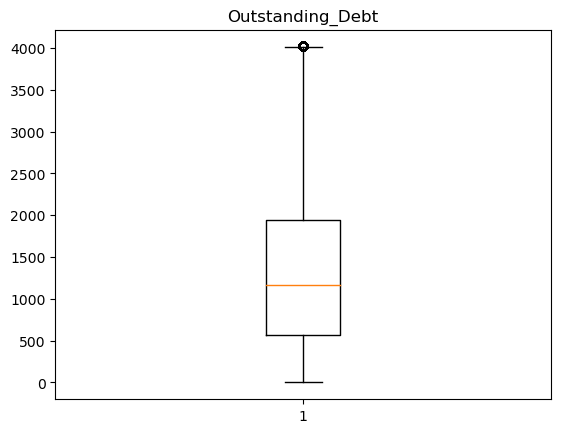

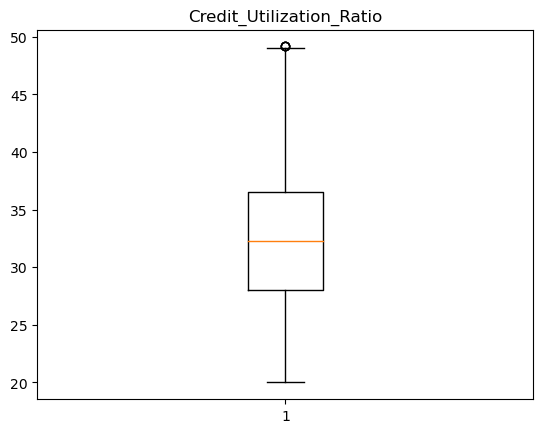

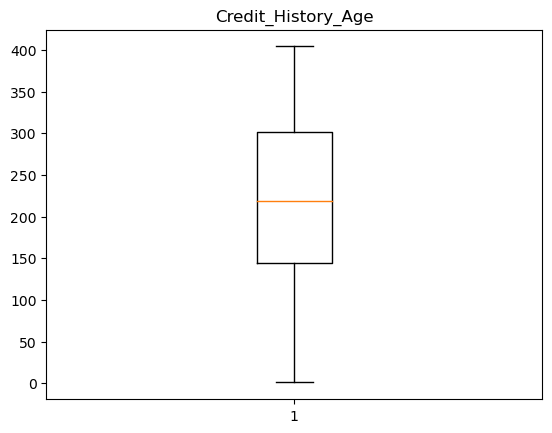

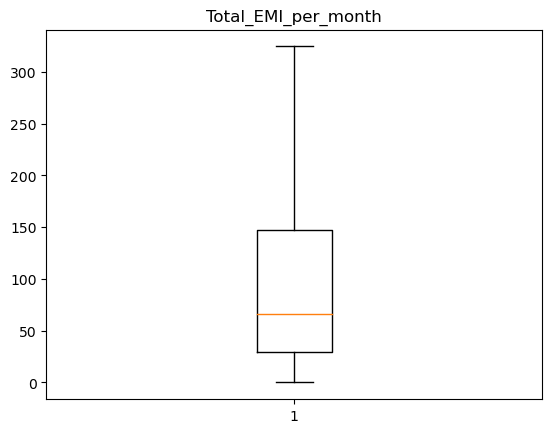

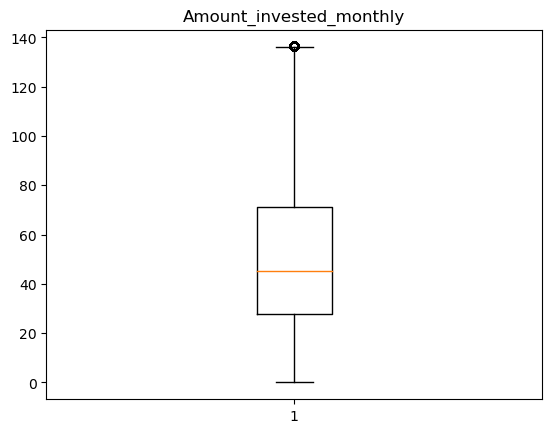

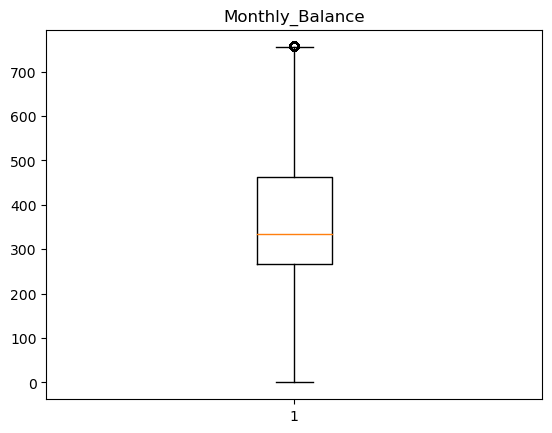

In [64]:
for z in new_columns_out_final:
  plt.figure(z)
  plt.boxplot(data[z])
  plt.title(z);

In [65]:
data.describe()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50187.123565,4169.919819,5.368820,5.533710,14.53208,3.532880,20.918030,13.313120,10.467515,5.791275,1399.897747,32.285156,221.220460,98.586705,53.463496,381.370204
std,37373.985236,3106.876173,2.593314,2.066757,8.74133,2.446356,14.395621,6.237166,6.601442,3.849239,1086.284812,5.116818,99.680716,92.290727,33.644003,172.149991
min,7005.930000,303.645417,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.000000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.000000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.000000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,150201.337500,12454.396249,11.000000,11.000000,34.00000,9.000000,55.000000,25.000000,29.055000,15.500000,4016.515000,49.162936,404.000000,324.578103,136.320266,756.629626


# **#THUS THE OUTLIERS ARE CLIPPED SUCCESSFULLY.** 

**#Now the next step in pre processing is to do Encoding(changing object/catergorical values ) into machine format for better ML algorithums. Then scaling (Standard scaling). If scaling is not done ML algoritum tends to weigh greater values.**

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Annual_Income             100000 non-null  float64
 1   Monthly_Inhand_Salary     100000 non-null  float64
 2   Num_Bank_Accounts         100000 non-null  int64  
 3   Num_Credit_Card           100000 non-null  int64  
 4   Interest_Rate             100000 non-null  int64  
 5   Num_of_Loan               100000 non-null  int64  
 6   Delay_from_due_date       100000 non-null  int64  
 7   Num_of_Delayed_Payment    100000 non-null  int64  
 8   Changed_Credit_Limit      100000 non-null  float64
 9   Num_Credit_Inquiries      100000 non-null  float64
 10  Credit_Mix                100000 non-null  object 
 11  Outstanding_Debt          100000 non-null  float64
 12  Credit_Utilization_Ratio  100000 non-null  float64
 13  Credit_History_Age        100000 non-null  in

In [67]:
data.columns

Index(['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score', 'Not Specified', 'Credit-Builder Loan', 'Personal Loan',
       'Debt Consolidation Loan', 'Student Loan', 'Payday Loan',
       'Mortgage Loan', 'Auto Loan', 'Home Equity Loan'],
      dtype='object')

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [69]:
cat_col = ['Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Credit_Score','Not Specified', 'Credit-Builder Loan', 'Personal Loan','Debt Consolidation Loan', 'Student Loan', 'Payday Loan','Mortgage Loan', 'Auto Loan', 'Home Equity Loan']

In [70]:
for column in cat_col:
    data[column] = le.fit_transform(data[column])

In [71]:
data.head(5)

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Credit_Score,Not Specified,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
0,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,...,0,0,1,1,0,0,0,0,1,1
1,19114.12,1824.843333,3,4,3,4,3,4,11.27,4.0,...,0,0,1,1,0,0,0,0,1,1
2,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,...,0,0,1,1,0,0,0,0,1,1
3,19114.12,1824.843333,3,4,3,4,5,4,6.27,4.0,...,0,0,1,1,0,0,0,0,1,1
4,19114.12,1824.843333,3,4,3,4,6,4,11.27,4.0,...,0,0,1,1,0,0,0,0,1,1


In [72]:
data.tail(5)

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Credit_Score,Not Specified,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
99995,39628.99,3359.415833,4,6,7,2,23,7,11.5,3.0,...,1,0,0,0,0,1,0,0,1,0
99996,39628.99,3359.415833,4,6,7,2,18,7,11.5,3.0,...,1,0,0,0,0,1,0,0,1,0
99997,39628.99,3359.415833,4,6,7,2,27,6,11.5,3.0,...,1,0,0,0,0,1,0,0,1,0
99998,39628.99,3359.415833,4,6,7,2,20,6,11.5,3.0,...,2,0,0,0,0,1,0,0,1,0
99999,39628.99,3359.415833,4,6,7,2,18,6,11.5,3.0,...,1,0,0,0,0,1,0,0,1,0


**DATA IS SUCCESSFULLY ENCODED and 1st 10 rows and last 10 rows are shown as proof of work.**

# Lets do a correlation between the variables

In [73]:
data.corr()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Credit_Score,Not Specified,Credit-Builder Loan,Personal Loan,Debt Consolidation Loan,Student Loan,Payday Loan,Mortgage Loan,Auto Loan,Home Equity Loan
Annual_Income,1.000000,0.998125,-0.282583,-0.218212,-0.302084,-0.256568,-0.251727,-0.283709,-0.175508,-0.281227,...,-0.078093,-0.090601,-0.116813,-0.104572,-0.106238,-0.096801,-0.096231,-0.094527,-0.101367,-0.098179
Monthly_Inhand_Salary,0.998125,1.000000,-0.281602,-0.217219,-0.301595,-0.255309,-0.251087,-0.282700,-0.175236,-0.280722,...,-0.076062,-0.090117,-0.115573,-0.103237,-0.106251,-0.096191,-0.096513,-0.094035,-0.100757,-0.097377
Num_Bank_Accounts,-0.282583,-0.281602,1.000000,0.442720,0.584302,0.472483,0.564791,0.601842,0.333760,0.519255,...,0.177389,0.173321,0.194927,0.190649,0.171334,0.161549,0.184869,0.198024,0.186165,0.184830
Num_Credit_Card,-0.218212,-0.217219,0.442720,1.000000,0.497912,0.417998,0.482487,0.423292,0.255419,0.459983,...,0.113270,0.160332,0.170449,0.159965,0.152998,0.155791,0.165976,0.169311,0.162917,0.155790
Interest_Rate,-0.302084,-0.301595,0.584302,0.497912,1.000000,0.559156,0.591861,0.571457,0.370122,0.633571,...,0.121088,0.211257,0.227115,0.212495,0.208782,0.213767,0.219906,0.223382,0.226156,0.224593
Num_of_Loan,-0.256568,-0.255309,0.472483,0.417998,0.559156,1.000000,0.504206,0.473919,0.374461,0.566225,...,0.064064,0.396081,0.408132,0.394127,0.384332,0.384261,0.400915,0.401842,0.391603,0.402149
Delay_from_due_date,-0.251727,-0.251087,0.564791,0.482487,0.591861,0.504206,1.000000,0.546170,0.300280,0.543472,...,0.100541,0.179937,0.187691,0.198027,0.196124,0.189544,0.195334,0.197575,0.190980,0.197695
Num_of_Delayed_Payment,-0.283709,-0.282700,0.601842,0.423292,0.571457,0.473919,0.546170,1.000000,0.329281,0.500648,...,0.203116,0.166638,0.204909,0.179115,0.165483,0.179497,0.177828,0.192396,0.191448,0.191059
Changed_Credit_Limit,-0.175508,-0.175236,0.333760,0.255419,0.370122,0.374461,0.300280,0.329281,1.000000,0.383625,...,0.190192,0.137402,0.153190,0.143916,0.140449,0.148699,0.135357,0.141814,0.148083,0.153134
Num_Credit_Inquiries,-0.281227,-0.280722,0.519255,0.459983,0.633571,0.566225,0.543472,0.500648,0.383625,1.000000,...,0.068232,0.215781,0.225501,0.215324,0.216607,0.222073,0.227669,0.223970,0.223254,0.224211


<Axes: >

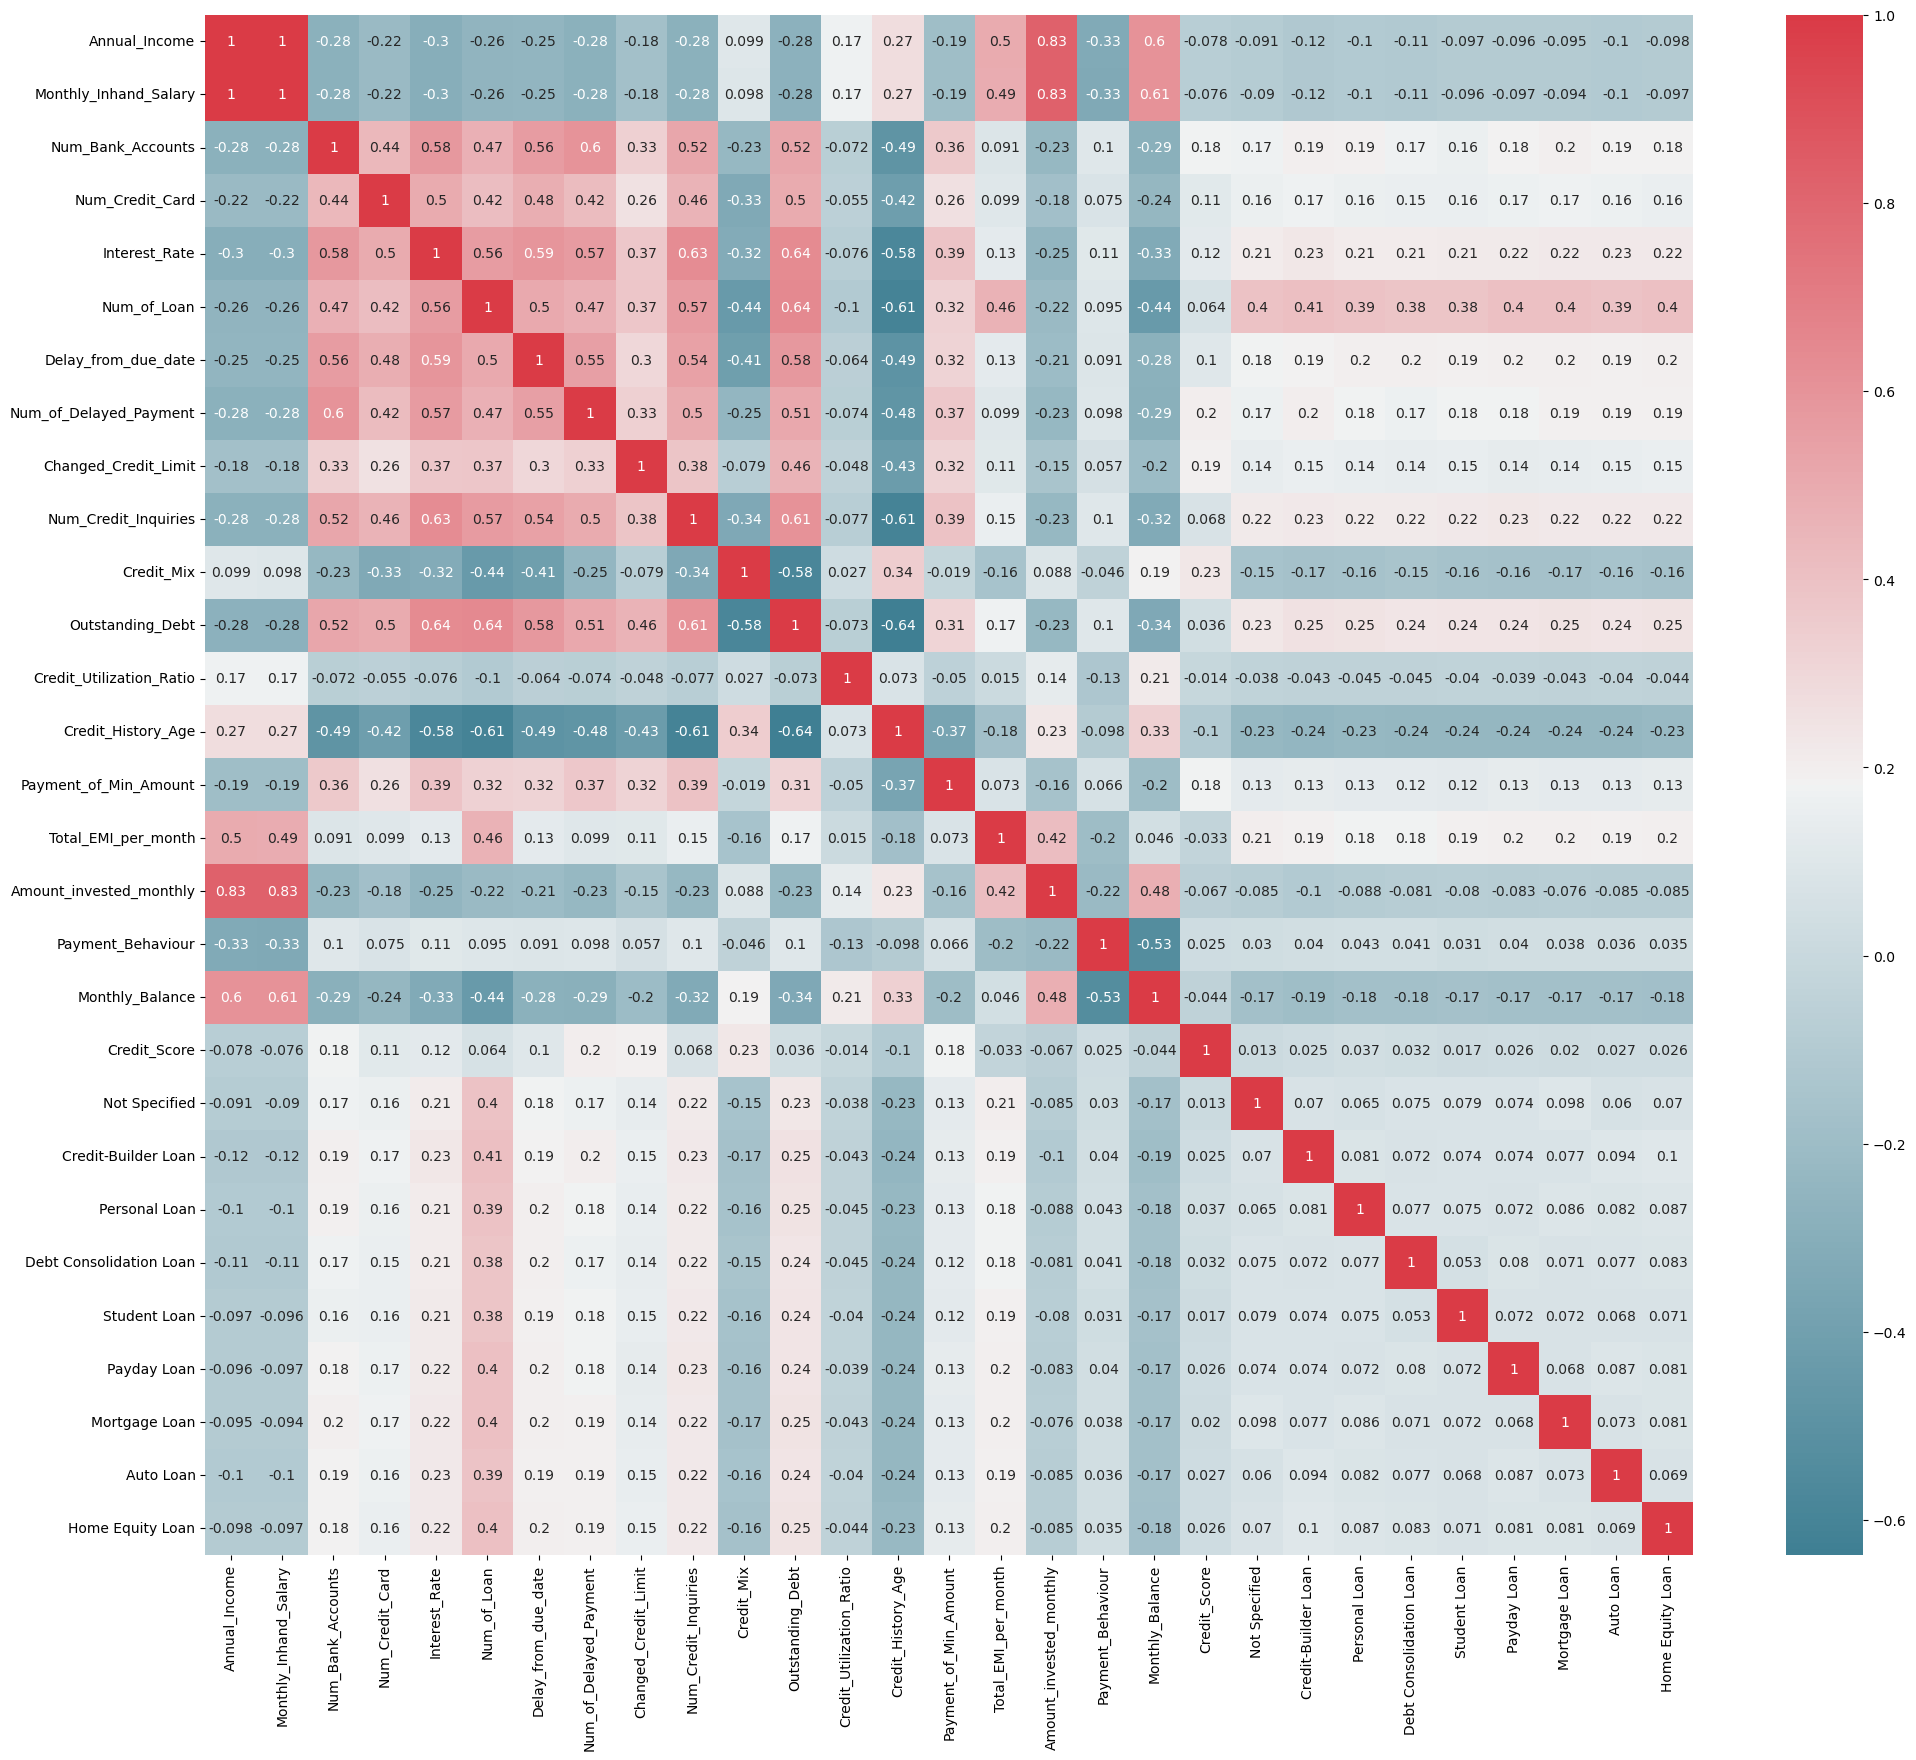

In [74]:
import seaborn as sns
plt.figure(figsize=(24,20))
cmap = sns.diverging_palette(220, 10, center='light', as_cmap=True)
sns.heatmap(data = data.corr(),annot=True,cmap=cmap)

#### **From the co-relation chart it is evident that tnhere is high relation between Annual Income and Monthly Inhand Salary. Hence we can drop any one of the. Drop Monthly Inhand Salary.**

In [75]:
data.drop('Monthly_Inhand_Salary',axis=1,inplace=True)

# Now lets do train_test_split_test and do scaling inside it.

### We have to Data_split: Divide the dataset into train, validation and test sets for model development.

In [76]:
y = data.Credit_Score
X = data.drop('Credit_Score',axis=1)

In [77]:
from sklearn.model_selection import train_test_split
X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_temp, y_test_temp, test_size=0.5, random_state=42)

In [78]:
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score, f1_score

#### Performing standard scaling to reduce the burden on the system due to high data weightage and also give prefference to lower data like age in terms of high values like Monthly Income.

In [79]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_temp=sc.fit_transform(X_train_temp)
X_test_temp=sc.fit_transform(X_test_temp)
X_val=sc.fit_transform(X_val)
X_test=sc.fit_transform(X_test)

**Phase-1-Week-1-Project Setup and Data Collection-THE END-----**

Lets check different models one by one:=

1.Logistic Regression.

2.Decision Trees

3.Random Forest.

4.KNN

5.Gaussian Naive Bayes

6.Neural Network (Multi-layer Perceptron)

7.AdaBoost Classifier

8.Gradient Boosting Classifier

9.XGBoost Classifier

10.SVM-SVC

# 1. Logistic Regression.

In [80]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_temp, y_train_temp)
logistic_reg_pred = logistic_reg.predict(X_test_temp)
logistic_reg_accuracy = accuracy_score(y_test_temp, logistic_reg_pred)
logistic_precision = precision_score(y_test_temp, logistic_reg_pred, average='macro')
logistic_recall = recall_score(y_test_temp, logistic_reg_pred, average='macro')
logistic_f1 = f1_score(y_test_temp, logistic_reg_pred, average='macro')
print("logistic_reg_accuracy:", logistic_reg_accuracy)
print("confusion_matrix:", confusion_matrix(y_test_temp,logistic_reg_pred))
print("precision_score:",logistic_precision)
print("recall_score:",logistic_recall)
print("f1_score:",logistic_f1)

logistic_reg_accuracy: 0.6474666666666666
confusion_matrix: [[ 2923    70  2329]
 [  482  4627  3696]
 [ 1742  2257 11874]]
precision_score: 0.6322216989475852
recall_score: 0.6075964125882596
f1_score: 0.6162722059968657


# 2. Decision Trees

In [81]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_temp, y_train_temp)
decision_tree_pred = decision_tree.predict(X_test_temp)
decision_tree_accuracy = accuracy_score(y_test_temp, decision_tree_pred)
decision_tree_precision = precision_score(y_test_temp, decision_tree_pred, average='macro')
decision_tree_recall = recall_score(y_test_temp, decision_tree_pred, average='macro')
decision_tree_f1 = f1_score(y_test_temp, decision_tree_pred, average='macro')
print("Decision Tree Accuracy:", decision_tree_accuracy)
print("confusion_matrix:", confusion_matrix(y_test_temp,decision_tree_pred))
print("precision_score:",decision_tree_precision)
print("recall_score:",decision_tree_recall)
print("f1_score:",decision_tree_f1)

Decision Tree Accuracy: 0.7169
confusion_matrix: [[ 3533   185  1604]
 [  169  6117  2519]
 [ 1681  2335 11857]]
precision_score: 0.7021824938541105
recall_score: 0.7018529446930216
f1_score: 0.7019860816837543


# 3. RandomForestClassifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train_temp, y_train_temp)
random_forest_pred = random_forest.predict(X_test_temp)
random_forest_accuracy = accuracy_score(y_test_temp, random_forest_pred)
random_forest_precision = precision_score(y_test_temp, random_forest_pred, average='macro')
random_forest_recall = recall_score(y_test_temp, random_forest_pred, average='macro')
random_forest_f1 = f1_score(y_test_temp, random_forest_pred, average='macro')
print("Random Forest Accuracy:", random_forest_accuracy)
print("confusion_matrix:", confusion_matrix(y_test_temp,random_forest_pred))
print("precision_score:",random_forest_precision)
print("recall_score:",random_forest_recall)
print("f1_score:",random_forest_f1)

Random Forest Accuracy: 0.8109
confusion_matrix: [[ 4045    37  1240]
 [   37  7366  1402]
 [ 1098  1859 12916]]
precision_score: 0.8021214841786488
recall_score: 0.8034438520388326
f1_score: 0.8025341786396895


# 4. K-Nearest Neighbors (K_NN) Classifier.

In [83]:
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbours=np.arange(3,15)
for k in neighbours:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    classifier.fit(X_train_temp, y_train_temp)
    knn_pred=classifier.predict(X_test_temp)
    knn_accuracy=accuracy_score(y_test_temp,knn_pred)
    metric_k.append(knn_accuracy)

Text(0, 0.5, 'metric_k')

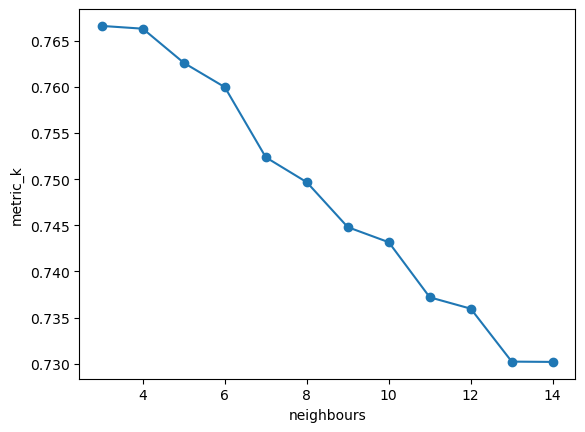

In [84]:
plt.plot(neighbours,metric_k,'o-')
plt.xlabel('neighbours')
plt.ylabel('metric_k')

### Choosing a value for 'k' which has max. metric_k value. 

In [85]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski',p=2)
classifier.fit(X_train_temp, y_train_temp)
knn_pred=classifier.predict(X_test_temp)
knn_accuracy=accuracy_score(y_test_temp,knn_pred)
knn_precision = precision_score(y_test_temp, knn_pred, average='macro')
knn_recall = recall_score(y_test_temp, knn_pred, average='macro')
knn_f1 = f1_score(y_test_temp, knn_pred, average='macro')
print("KNN Accuracy:", knn_accuracy)
print("confusion_matrix:", confusion_matrix(y_test_temp,knn_pred))
print("precision_score:",knn_precision)
print("recall_score:",knn_recall)
print("f1_score:",knn_f1)

KNN Accuracy: 0.7666
confusion_matrix: [[ 3827    83  1412]
 [  279  6854  1672]
 [ 1592  1964 12317]]
precision_score: 0.7471394247358658
recall_score: 0.7578278983108154
f1_score: 0.752146416395738


# 5. Gaussian Naive Bayes

In [86]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_temp, y_train_temp)
naive_bayes_pred = naive_bayes.predict(X_test_temp)
naive_bayes_accuracy = accuracy_score(y_test_temp, naive_bayes_pred)
naive_bayes_precision = precision_score(y_test_temp, naive_bayes_pred, average='macro')
naive_bayes_recall = recall_score(y_test_temp, naive_bayes_pred, average='macro')
naive_bayes_f1 = f1_score(y_test_temp, naive_bayes_pred, average='macro')
print("GaussianNB Accuracy:", naive_bayes_accuracy)
print("GaussianNB confusion_matrix:", confusion_matrix(y_test_temp,naive_bayes_pred))
print("GaussianNB precision_score:",naive_bayes_precision)
print("GaussianNB recall_score:",naive_bayes_recall)
print("GaussianNB f1_score:",naive_bayes_f1)

GaussianNB Accuracy: 0.6212666666666666
GaussianNB confusion_matrix: [[4395  136  791]
 [1471 6078 1256]
 [4192 3516 8165]]
GaussianNB precision_score: 0.6203937101909438
GaussianNB recall_score: 0.6768341614889039
GaussianNB f1_score: 0.617797348057596


# 6. Neural Network (Multi-layer Perceptron)

In [87]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier()
MLP.fit(X_train_temp, y_train_temp)
MLP_pred = MLP.predict(X_test_temp)
MLP_accuracy = accuracy_score(y_test_temp, MLP_pred)
MLP_precision = precision_score(y_test_temp, MLP_pred, average='macro')
MLP_recall = recall_score(y_test_temp, MLP_pred, average='macro')
MLP_f1 = f1_score(y_test_temp, MLP_pred, average='macro')
print("MLP Accuracy:", MLP_accuracy)
print("MLP confusion_matrix:", confusion_matrix(y_test_temp,MLP_pred))
print("MLP precision_score:",MLP_precision)
print("MLP recall_score:",MLP_recall)
print("MLP f1_score:",MLP_f1)

MLP Accuracy: 0.7208666666666667
MLP confusion_matrix: [[ 3368   163  1791]
 [  372  6006  2427]
 [ 1606  2015 12252]]
MLP precision_score: 0.7025909017379335
MLP recall_score: 0.6956113343941311
MLP f1_score: 0.6986986567524035


D:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# 7. AdaBoost Classifier

In [88]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train_temp, y_train_temp)
ada_pred = ada.predict(X_test_temp)
ada_accuracy = accuracy_score(y_test_temp, ada_pred)
ada_precision = precision_score(y_test_temp, ada_pred, average='macro')
ada_recall = recall_score(y_test_temp, ada_pred, average='macro')
ada_f1 = f1_score(y_test_temp, ada_pred, average='macro')
print("ada Accuracy:", ada_accuracy)
print("ada confusion_matrix:", confusion_matrix(y_test_temp,ada_pred))
print("ada precision_score:",ada_precision)
print("ada recall_score:",ada_recall)
print("ada f1_score:",ada_f1)

ada Accuracy: 0.6659
ada confusion_matrix: [[ 3173   110  2039]
 [  641  5184  2980]
 [ 1823  2430 11620]]
ada precision_score: 0.6441340598249804
ada recall_score: 0.6390071849665181
ada f1_score: 0.6403805342035488


# 8. Gradient Boosting Classifier

In [89]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train_temp, y_train_temp)
gbc_pred = gbc.predict(X_test_temp)
gbc_accuracy = accuracy_score(y_test_temp, gbc_pred)
gbc_precision = precision_score(y_test_temp, gbc_pred, average='macro')
gbc_recall = recall_score(y_test_temp, gbc_pred, average='macro')
gbc_f1 = f1_score(y_test_temp, gbc_pred, average='macro')
print("gbc Accuracy:", gbc_accuracy)
print("gbc confusion_matrix:", confusion_matrix(y_test_temp,gbc_pred))
print("gbc precision_score:",gbc_precision)
print("gbc recall_score:",gbc_recall)
print("gbc f1_score:",gbc_f1)

gbc Accuracy: 0.7097
gbc confusion_matrix: [[ 3749    72  1501]
 [  655  5667  2483]
 [ 2094  1904 11875]]
gbc precision_score: 0.6890652358130264
gbc recall_score: 0.6987239185340091
gbc f1_score: 0.6906283728435542


# 9. XGBoost Classifier 

In [90]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train_temp, y_train_temp)
xgb_pred = xgb.predict(X_test_temp)

xgb_accuracy = accuracy_score(y_test_temp, xgb_pred)
xgb_precision = precision_score(y_test_temp, xgb_pred, average='macro')
xgb_recall = recall_score(y_test_temp, xgb_pred, average='macro')
xgb_f1 = f1_score(y_test_temp, xgb_pred, average='macro')
print("xgb Accuracy:", xgb_accuracy)
print("xgb confusion_matrix:", confusion_matrix(y_test_temp,xgb_pred))
print("xgb precision_score:",xgb_precision)
print("xgb recall_score:",xgb_recall)
print("xgb f1_score:",xgb_f1)

xgb Accuracy: 0.7217
xgb confusion_matrix: [[ 4044    85  1193]
 [  680  5691  2434]
 [ 2234  1723 11916]]
xgb precision_score: 0.7022500156269235
xgb recall_score: 0.7189702571901243
xgb f1_score: 0.7051123872287101


# 10.  Support Vector Machine (SVM)

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_temp, y_train_temp)
svm_pred = svm.predict(X_test_temp)
svm_accuracy = accuracy_score(y_test_temp, svm_pred)
svm_precision = precision_score(y_test_temp, svm_pred, average='macro')
svm_recall = recall_score(y_test_temp, svm_pred, average='macro')
svm_f1 = f1_score(y_test_temp, svm_pred, average='macro')
print("SVM Accuracy:", svm_accuracy)
print("confusion_matrix:", confusion_matrix(y_test_temp,svm_pred))
print("precision_score:",svm_precision)
print("recall_score:",svm_recall)
print("f1_score:",svm_f1)

# 10 models are executed here. SVM(SVC) takes too many time to execute. Hence it is not taken for hyper parameter tuning.

# Hyperparameter Tuning.

1. Logistic Regression

2. Decision Trees

3. Random Forest

4. svm svc

# 1.Logistic Regression HPT

**Grid Search: Exhaustive search over a specified parameter grid.
Random Search: Randomly sample the hyperparameter space.
Bayesian Optimization: Uses probabilistic models to find the best hyperparameters.
Gradient-based Optimization: Uses gradients to optimize hyperparameters.**
Here I am using Random search method

In [91]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution
param_dist = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Initialize Random Search
random_search = RandomizedSearchCV(estimator=logistic_reg, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, n_jobs=-1, random_state=42)

# Fit the model
random_search.fit(X_train_temp, y_train_temp)

# Get the best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


D:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
225 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "D:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver =

Best Parameters: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.1}
Best Model: LogisticRegression(C=0.1, solver='newton-cg')


In [92]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on the test set
y_pred_lg_hpt = best_model.predict(X_test_temp)

# Evaluate the model
accuracy = accuracy_score(y_test_temp, y_pred_lg_hpt)
report = classification_report(y_test_temp, y_pred_lg_hpt)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.6472333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.55      0.56      5322
           1       0.67      0.53      0.59      8805
           2       0.66      0.75      0.70     15873

    accuracy                           0.65     30000
   macro avg       0.63      0.61      0.62     30000
weighted avg       0.65      0.65      0.64     30000



# 2.Decision Trees HPT

from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}
grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=10, verbose=1, n_jobs=-1)
grid_search.fit(X_train_temp, y_train_temp)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

# Predict on the test set
y_pred_dt_hpt = best_model.predict(X_test_temp)

# Evaluate the model
accuracy = accuracy_score(y_test_temp, y_pred_dt_hpt)
report = classification_report(y_test_temp, y_pred_dt_hpt)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# 3.Random Forest HPT

In [93]:
rf_clf = RandomForestClassifier(n_estimators=20,max_depth=20,criterion='entropy',min_samples_split=2)
rf_clf.fit(X_train_temp,y_train_temp)
y_pred_rf_clf = rf_clf.predict(X_test_temp)
print('confusion_matrix',confusion_matrix(y_test_temp,y_pred_rf_clf))
print('Accuracy',accuracy_score(y_test_temp,y_pred_rf_clf))
print("precision_score:",precision_score(y_test_temp,y_pred_rf_clf, average='macro'))
print("recall_score:",recall_score(y_test_temp,y_pred_rf_clf, average='macro'))
print("f1_score:",f1_score(y_test_temp,y_pred_rf_clf, average='macro'))

confusion_matrix [[ 4002    36  1284]
 [  228  7000  1577]
 [ 1321  1847 12705]]
Accuracy 0.7902333333333333
precision_score: 0.7750584077522821
recall_score: 0.7824638607381579
f1_score: 0.7786214184541019


# 4. SVC SVM HPT

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV **executed but not running**

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train_temp, y_train_temp)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

# Predict on the test set
y_pred_svm_hpt= best_model.predict(X_test_temp)

# Evaluate the model
accuracy = accuracy_score(y_test_temp, y_pred_svm_hpt)
report = classification_report(y_test_temp, y_pred_svm_hpt)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# CHOOSING RANDOM FOREST CLASSIFIER as selected model.

**Random forest hyper tuning parameter is selected as the best model and is given best parameters to finf the best.** 

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [95]:
# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Initialize RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
rf_random.fit(X_train_temp, y_train_temp)

# Get the best model
best_rf = rf_random.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


D:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
126 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
97 fits failed with the following error:
Traceback (most recent call last):
  File "D:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "D:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "D:\ProgramData\anaconda3\Lib\site-package

**Model Evaluation using metrics on the validation dataset.**

In [96]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the best model on the validation set
y_pred_rf = best_rf.predict(X_val)

print(f'Accuracy: {accuracy_score(y_val, y_pred_rf)}')
print(f'Confusion Matrix:\n {confusion_matrix(y_val, y_pred_rf)}')
print(f'Classification Report:\n {classification_report(y_val, y_pred_rf)}')

# Evaluate the best model on the test set
y_test_pred_rf = best_rf.predict(X_test)

print(f'Test Accuracy: {accuracy_score(y_test, y_test_pred_rf)}')
print(f'Test Confusion Matrix:\n {confusion_matrix(y_test, y_test_pred_rf)}')
print(f'Test Classification Report:\n {classification_report(y_test, y_test_pred_rf)}')


Accuracy: 0.8140666666666667
Confusion Matrix:
 [[1994    8  633]
 [  15 3728  695]
 [ 539  899 6489]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      2635
           1       0.80      0.84      0.82      4438
           2       0.83      0.82      0.82      7927

    accuracy                           0.81     15000
   macro avg       0.81      0.81      0.81     15000
weighted avg       0.81      0.81      0.81     15000

Test Accuracy: 0.8156
Test Confusion Matrix:
 [[2067   11  609]
 [  20 3650  697]
 [ 508  921 6517]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.77      0.78      2687
           1       0.80      0.84      0.82      4367
           2       0.83      0.82      0.83      7946

    accuracy                           0.82     15000
   macro avg       0.81      0.81      0.81     15000
weighted avg       0.82      0.82   

**Phase-2-Week-Model Evaluation using metrics on the validation dataset----THE END-----.**

# week 3 - Phase 3